In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

In [2]:
try:
    import scrapy
except:
    !pip3 install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

In [3]:
import json
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://www.ph.lacounty.gov/media/Coronavirus/locations.htm'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        cities = response.xpath('//table/tr/td[1]').extract()
        cases = response.xpath('//table/tr/td[2]').extract()
        rates = response.xpath('//table/tr/td[3]').extract()
        cities = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cities))
        cases = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cases))
        rates = list(map(lambda x: x.replace('<td>','').replace('</td>',''), rates))
        alist=[]
        lacitiesdata = { "lacitiescovid": alist }
        i = 0
        for city in cities:
            if i<28:
                i=i+1
                continue
            arec = { 'city': city, 'cases': cases[i] , 'rate':rates[i]}
            i=i+1
            alist.append(arec)
        with open('lacovidinfo.json', 'w') as jsonfile:
            print(json.dump(lacitiesdata, jsonfile, indent=4))
        alist

In [4]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()


2020-04-26 20:06:37 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-04-26 20:06:38 [scrapy.utils.log] INFO: Versions: lxml 4.5.0.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.6 (default, Dec 30 2019, 19:38:26) - [Clang 11.0.0 (clang-1100.0.33.16)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-04-26 20:06:38 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-04-26 20:06:38 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-04-26 20:06:38 [py.warnings] WARNING: /usr/local/lib/python3.7/site-packages/scrapy/extensions/feedexport.py:210: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)


None


In [5]:
import pandas as pd

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

res = pd.read_json('lacovidinfo.json')
lcc = res.lacitiescovid
alist = []
llist = []
for x in lcc:
    if x['cases'] == '' or  x['cases'] == '--': 
        continue
    if x['rate'] == '--' or x['rate'] == '':
        continue
    if not is_number(x['cases']):
        continue
    if not is_number(x['rate']):
        continue
    anent = { 'city': x['city'], 'cases': float(x['cases']), 'rate': float(x['rate'])}
    alist.append(anent)
    if not x['city'].startswith('Los Angeles - '):
        continue
    llist.append(anent)
adf = pd.DataFrame(alist)
ldf = pd.DataFrame(llist)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf)


                                      city  cases    rate
0            Los Angeles - Adams-Normandie   24.0  292.61
1                     Los Angeles - Alsace   25.0  200.88
2    Los Angeles - Angeles National Forest    0.0    0.00
3           Los Angeles - Angelino Heights    6.0  239.81
4                     Los Angeles - Arleta   76.0  221.12
5            Los Angeles - Atwater Village   21.0  143.19
6              Los Angeles - Baldwin Hills   51.0  163.86
7                    Los Angeles - Bel Air   28.0  332.19
8              Los Angeles - Beverly Crest   32.0  255.49
9                Los Angeles - Beverlywood   30.0  227.74
10             Los Angeles - Boyle Heights  157.0  180.70
11                 Los Angeles - Brentwood   63.0  203.52
12                 Los Angeles - Brookside    0.0    0.00
13          Los Angeles - Cadillac-Corning   15.0  210.64
14               Los Angeles - Canoga Park  200.0  306.33
15                   Los Angeles - Carthay   62.0  431.66
16            

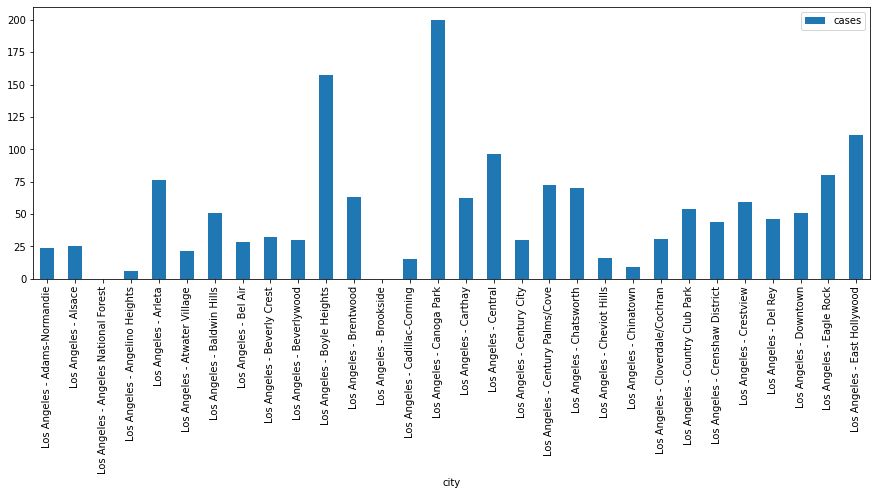

In [6]:
ldf[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

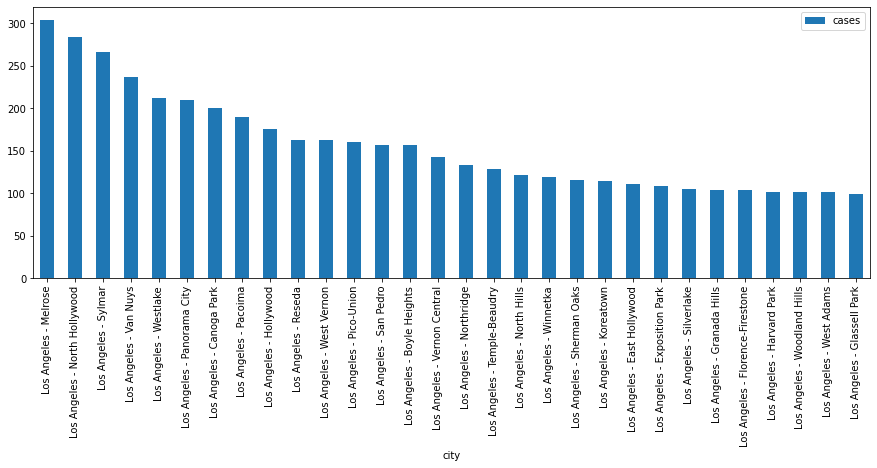

In [7]:
ldf.sort_values(by='cases', ascending=False)[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf.sort_values(by='rate', ascending=False))


                                      city  cases    rate
62            Los Angeles - Little Armenia   78.0  971.96
25                 Los Angeles - Crestview   59.0  519.00
120           Los Angeles - Vermont Square   36.0  470.16
15                   Los Angeles - Carthay   62.0  431.66
71                   Los Angeles - Melrose  304.0  391.27
85                Los Angeles - Pico-Union  160.0  382.39
29            Los Angeles - East Hollywood  111.0  379.01
123            Los Angeles - Victoria Park   31.0  369.09
51     Los Angeles - Historic Filipinotown   51.0  367.70
92              Los Angeles - Reseda Ranch   17.0  366.70
127               Los Angeles - West Adams  101.0  365.54
44              Los Angeles - Hancock Park   61.0  358.00
132                 Los Angeles - Westlake  212.0  357.17
23         Los Angeles - Country Club Park   54.0  356.37
116           Los Angeles - Valley Village   84.0  339.81
7                    Los Angeles - Bel Air   28.0  332.19
59          Lo

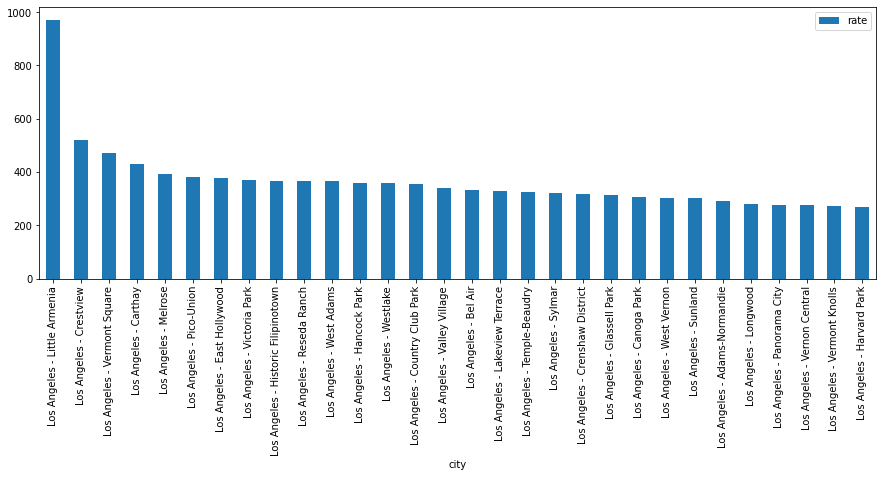

In [12]:
ldf.sort_values(by='rate', ascending=False)[:30].plot(kind='bar', x='city', y='rate', figsize=(15,5))

In [18]:
import os
import psycopg2

DATABASE_URL = os.environ['DATABASE_URL']

conn = psycopg2.connect(DATABASE_URL, sslmode='require')

In [19]:
cur = conn.cursor()

In [22]:
#cur.execute("CREATE TABLE test (id serial PRIMARY KEY, num integer, data varchar);")

In [21]:
#cur.execute("INSERT INTO test (num, data) VALUES (%s, %s)",(100, "abc'def"))

In [20]:
cur.execute("SELECT * FROM test;")
cur.fetchone()

(1, 100, "abc'def")

In [17]:
conn.commit()
cur.close()
conn.close()